# COMP47670 - Assignment 1: DATA COLLECTION & PREPARATION

## RAYNA VARGHESE

## S19200265

### Task 1: Identify one or more suitable web APIs

#### <font color=orange>__*API Selection:*__</font>

API for this assignment was chosen from [Alpha Vantage](https://www.alphavantage.co/), which is a website for realtime and historic financial stock data. The API is freely available.
<br> For this assignment, [Monthly Time Series](https://www.alphavantage.co/documentation/#monthly) and [Relative Strength Index (RSI)](https://www.alphavantage.co/documentation/#rsi) were selected for analysis of the *'stocks of Microsoft.'*
<br> The API key that I recieved is as follows. There are few packages that need to be installed for which I have put commands.

In [96]:
import requests
import pandas as pd
import datetime
import csv
import numpy as np
# alpha vantage inbuilt packages and functions
%pip install alphavantage 
from alpha_vantage.techindicators import TechIndicators

In [97]:
api_key = "12728HFX0VFH1DQU"

***

### Task 2: Collection, Parsing and Storage of Data from chosen API(s)

#### <font color=orange>Collecting Raw Data and Storing in csv file: </font>

The function <u>*get_stock()*</u> is written for collecting the <u>*monthly time series*</u> data from the API, parsing it and storing in the csv file. This function is used for extracting prices and volumes of the stock.
<br> For the technical indicator i.e <u>*rsi*</u>,the inbuilt functions from <u>*alpha_vantage*</u> package is used which is stored in the csv file. RSI is intended to chart the current and historical strength or weakness of a stock or market based on the closing prices of a recent trading period.


In [98]:
# Here, 'stock' is the company, 'function' and 'sub_function' is the time series function based on monthly data.
def get_stock(api_key, stock, function, sub_function):  
    data = requests.get("https://www.alphavantage.co/query?function="+ function +"&symbol="+ stock +"&apikey="+ api_key)
    data = data.json() # The acquired data is converted in json format
    data = data[sub_function]
    df = pd.DataFrame(columns=['date','open','high','low','close','volume']) # Assigning names of the column to the dataframe
    for d,p in data.items():  # Parsing of date and price in the data
        date = datetime.datetime.strptime(d,'%Y-%m-%d')
        data_row = [date, float(p['1. open']), float(p['2. high']), float(p['3. low']), float(p['4. close']), int(p['5. volume'])]
        df.loc[-1,:] = data_row
        df.index = df.index + 1     
    df = df.sort_values('date') # Sorting the date in ascending order
    df.to_csv(r'stockdata.csv', index = False) #storing the stock prices data in csv file 
    print("Stock Data Collected and stored in csv \n")

In [99]:
# MSFT-Microsoft (other companies like Google(GOOG), Dow Jones Industrial(DJI), Facebook(FB) etc can be used)
get_stock(api_key, "MSFT", "TIME_SERIES_MONTHLY", "Monthly Time Series") 

Stock Data Collected and stored in csv 



In [100]:
# from the alpha_vantage package, TechIndicators id called which extracts the data and stores it as a dataframe 
ti = TechIndicators(key=api_key, output_format='pandas')
data, meta_data = ti.get_rsi(symbol='MSFT', interval='daily', time_period=60)
#data.head()
data.to_csv(r'rsi.csv', index = True) # Storing the data in csv file. As 'date' is extracted as index, saving it in csv so as to 
# make it a column
print("Technical Indicator collected and 'stored' in csv")

Technical Indicator collected and 'stored' in csv


***

### Task 4: Load and represent the data using an appropriate data structure. 

<font color=orange>Using Pandas:</font>

__Pandas__ is used to import data from csv file to dataframes.
<br>The __'stock_data'__ has high, low, open, close prices and volume of stock with the monthly data.
<br>The __'indicator'__ has rsi values on weekly basis.

In [101]:
stock_file = "stockdata.csv"
indicator_file = "rsi.csv"
# making dataframes of both the csv files for easier usage
stock_data = pd.read_csv(stock_file)
indicator = pd.read_csv(indicator_file)

In [102]:
stock_data[0:5]

,date,open,high,low,close,volume
0,2000-04-28 00:00:00,94.44,96.50,65.00,69.75,1129073300
1,2000-05-31 00:00:00,72.87,74.00,60.38,62.56,672215400
2,2000-06-30 00:00:00,64.37,82.19,63.81,80.00,733525100
3,2000-07-31 00:00:00,79.69,82.87,67.25,69.81,617092900
4,2000-08-31 00:00:00,69.94,74.87,68.12,69.81,609699900


In [103]:
indicator[0:5]

,date,RSI
0,2000-06-16 00:00:00,39.1317
1,2000-06-19 00:00:00,39.6231
2,2000-06-20 00:00:00,40.1665
3,2000-06-21 00:00:00,42.5839
4,2000-06-22 00:00:00,42.3358


#### <font color=orange>Checking for Missing Values:<font>

As there are no missing values no pre-processing steps are required.

In [104]:
#checking for null data in the stored data
stock_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [105]:
indicator.isnull().sum()

date    0
RSI     0
dtype: int64

***

### Task 5: Analyse and summarise the cleaned dataset

#### <font color= orange>Descriptive Statistics<font>

In [106]:
#Analyse and summarising the data of both datasets
print("Summary Statistics of Stock Data:\n")
print(stock_data.describe())
print("\nSummary Statistics of Technical Indicator(RSI):\n")
print(indicator.describe())

Summary Statistics of Stock Data:

             open        high         low       close        volume
count  240.000000  240.000000  240.000000  240.000000  2.400000e+02
mean    47.857095   50.786741   45.005526   47.987624  1.032689e+09
std     31.032057   33.046972   29.190844   31.380097  4.170403e+08
min     16.035000   18.880000   14.870000   16.150000  3.671344e+08
25%     26.860000   28.037750   25.597500   26.704775  6.877302e+08
50%     32.140000   35.240000   30.895000   32.850000  9.980080e+08
75%     58.750000   63.747500   54.312500   58.197500  1.311714e+09
max    170.430000  190.700000  156.510000  170.230000  3.044579e+09

Summary Statistics of Technical Indicator(RSI):

               RSI
count  4973.000000
mean     51.509988
std       6.031288
min      32.873600
25%      47.272900
50%      51.369800
75%      55.986500
max      70.202800


***

### TASK 6: Apply pre-processing steps to filter/simplify/breakdown the datasets

#### <font color=orange>Modifying datasets:</font>

Simplifying and breaking down the dataset from further analysis.

In [107]:
# Converting datetime format to 'Month-Year' format for better representation
stock_data['date'] = pd.to_datetime(stock_data['date']) 
stock_data['date'] = stock_data['date'].dt.strftime('%b-%Y')
stock_data.head()

,date,open,high,low,close,volume
0,Apr-2000,94.44,96.50,65.00,69.75,1129073300
1,May-2000,72.87,74.00,60.38,62.56,672215400
2,Jun-2000,64.37,82.19,63.81,80.00,733525100
3,Jul-2000,79.69,82.87,67.25,69.81,617092900
4,Aug-2000,69.94,74.87,68.12,69.81,609699900


In [108]:
# Creating simplified data for analysis of year 2019
stock_2019 = stock_data[stock_data['date'].str.contains("2019")] # filtering data of only the year 2019
stock_2019.index = np.arange(len(stock_2019)) # Sorting the dates in ascending order
print(stock_2019)

        date     open      high      low   close     volume
0   Jan-2019   99.550  107.9000   97.200  104.43  714204787
1   Feb-2019  103.775  113.2400  102.350  112.03  469095970
2   Mar-2019  112.890  120.8200  108.800  117.94  589045341
3   Apr-2019  118.950  131.3700  118.100  130.60  433157868
4   May-2019  130.530  130.6500  123.040  123.68  547218448
5   Jun-2019  123.850  138.4000  119.010  133.96  508324437
6   Jul-2019  136.630  141.6750  134.670  136.27  484553299
7   Aug-2019  137.000  140.9383  130.780  137.86  585509525
8   Sep-2019  136.610  142.3700  134.510  139.03  477645820
9   Oct-2019  139.660  145.6700  133.220  143.37  560654410
10  Nov-2019  144.260  152.5000  142.965  151.38  393028043
11  Dec-2019  151.810  159.5500  146.650  157.70  452664147


In [109]:
# Creating a new column 'year' from the date 
indicator['year'] = pd.to_datetime(indicator['date']).dt.strftime('%Y')
#indicator.head()
# Taking the average of RSI for each year from weekly reports.
avg_year = indicator.groupby(    #https://stackoverflow.com/questions/47244294/python-grouping-by-date-and-finding-the-average-of-a-column-inside-a-dataframe
    [pd.to_datetime(indicator.date).dt.strftime('%Y'), 'year']
)['RSI'].mean().reset_index(name='average rsi')

print(avg_year)

    date  year  average rsi
0   2000  2000    42.138787
1   2001  2001    49.815575
2   2002  2002    48.134212
3   2003  2003    43.774249
4   2004  2004    50.120644
5   2005  2005    48.735008
6   2006  2006    51.783117
7   2007  2007    53.132776
8   2008  2008    46.507117
9   2009  2009    53.385457
10  2010  2010    49.858469
11  2011  2011    49.578115
12  2012  2012    51.813349
13  2013  2013    53.980427
14  2014  2014    55.841501
15  2015  2015    51.665598
16  2016  2016    53.240187
17  2017  2017    58.835911
18  2018  2018    56.032477
19  2019  2019    55.938692
20  2020  2020    58.855354


***

### TASK 7: Data Analysis

#### <font color=orange>Plots, Graphs & Insights:</font>

In [110]:
# plotting packages
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import matplotlib.patches as mpatches #for legend
import seaborn as sns
from matplotlib import style # for ggplot- better visualization
from pandas.plotting import register_matplotlib_converters
# 'plotly' packages and installation
%pip install plotly==4.5.4
import plotly as py # for candelstick plot
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # offline mode

#### - <font color=purple>PLOT 1: Bar Plot</font>

Two plots : Bar plot and Multiple line plots are used to analyse the stocks of the year 2019.

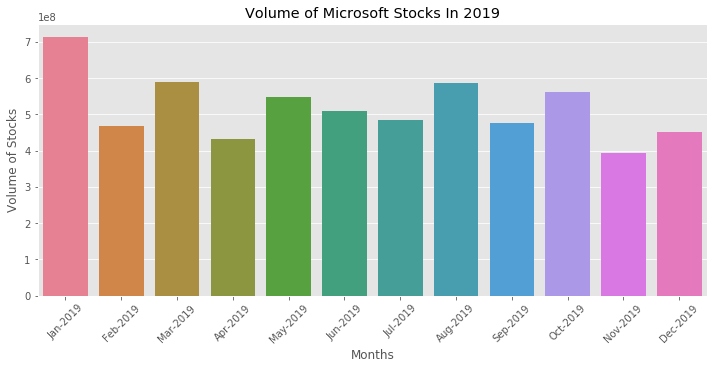

In [111]:
style.use('ggplot')
fig = plt.figure(figsize=(12,5))
sns.barplot(x='date', y='volume', data=stock_2019, ci=None, palette='husl')
plt.title("Volume of Microsoft Stocks In 2019")
plt.xlabel('Months')
plt.ylabel('Volume of Stocks')
plt.xticks(np.arange(len(stock_2019['date'])),stock_2019['date'],rotation = 45)
plt.show()

> _From the above bar plot, it is quite evident that the month of January had the highest volume of stocks. There has been a decrease in the volume towards the end of the year. It can also be noticed that there is an alternating increase and decrease in the volume every next month._

#### - <font color=purple>PLOT 2: Multiple Line Plots</font>

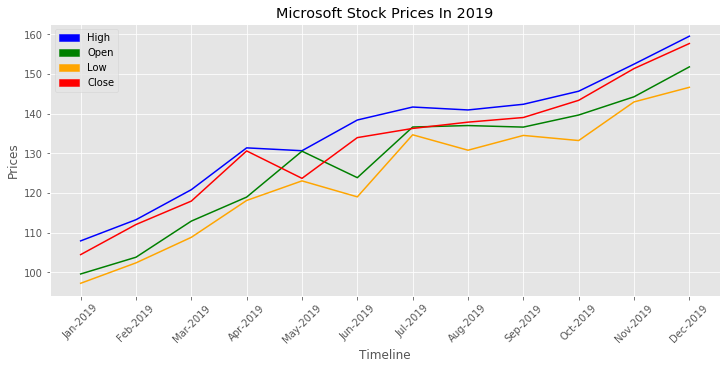

In [112]:
# plot lines of each price
style.use('ggplot')
fig = plt.figure(figsize=(12,5))
plt.plot(stock_2019["high"], color='blue')
plt.plot(stock_2019["open"], color='green')
plt.plot(stock_2019["low"], color='orange')
plt.plot(stock_2019["close"], color='red')

#title
plt.title('Microsoft Stock Prices In 2019')

#labels
plt.xlabel('Timeline')
plt.ylabel('Prices')
plt.xticks(np.arange(len(stock_2019['date'])),stock_2019['date'],rotation = 45)

#legend
green_patch = mpatches.Patch(color='green', label='Open')
blue_patch = mpatches.Patch(color='blue', label='High')
orange_patch = mpatches.Patch(color='orange', label='Low')
red_patch = mpatches.Patch(color='red', label='Close')
plt.legend(handles=[blue_patch, green_patch, orange_patch, red_patch])

#plt.grid(True)

plt.show()

>_From the above line graph, the market opened for trading in the year 2019 at an average of 100. The highest price at which the stocks were traded was at 160 in December and the lowest price being around 97.The market was closed at around 158 in December. As 'close' is higher than 'open', the year 2019 was evidently positive for Microsoft._

***

#### - <font color=purple>PLOT 3: Line Plot</font>

Analysing Relative Strength Index of Microsoft from the year 2000.

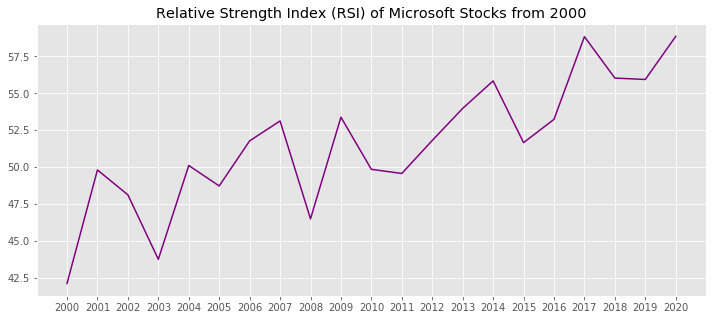

In [113]:
#PLOT5: line for rsi
style.use('ggplot')
fig, ax4 = plt.subplots(figsize=(12,5))
plt.plot(avg_year['date'], avg_year['average rsi'], c='purple')
plt.title("Relative Strength Index (RSI) of Microsoft Stocks from 2000")
#plt.grid()
plt.show()

>_Relative Strength Index helps to decide when to buy or sell stocks._

#### - <font color=purple>PLOT 4: Histogram</font>

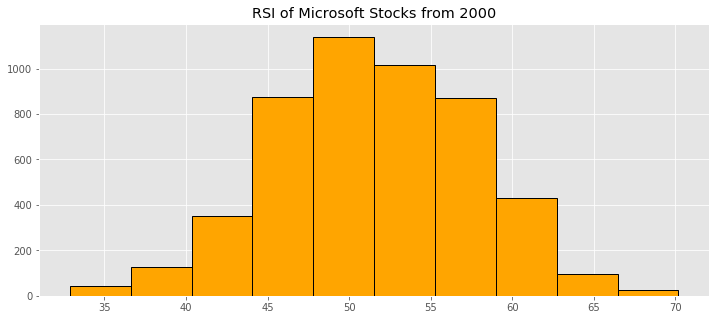

In [114]:
style.use('ggplot')
fig, ax5 = plt.subplots(figsize=(12,5))
years = indicator['date']
rsi = indicator['RSI']

plt.hist(rsi, color='orange',edgecolor='black', linewidth=1)
plt.title("RSI of Microsoft Stocks from 2000")

plt.show()

>_The Histogram above shows that most of the Relative Srength Index is maintained between 40-60 , which is desirable even though it oscillates a bit between oversold(<30) and overbought(>70)_

***

#### - <font color=purple>PLOT 5: Regression Scatter Plot</font>

Analysing OHLC of Microsoft from year 2014.

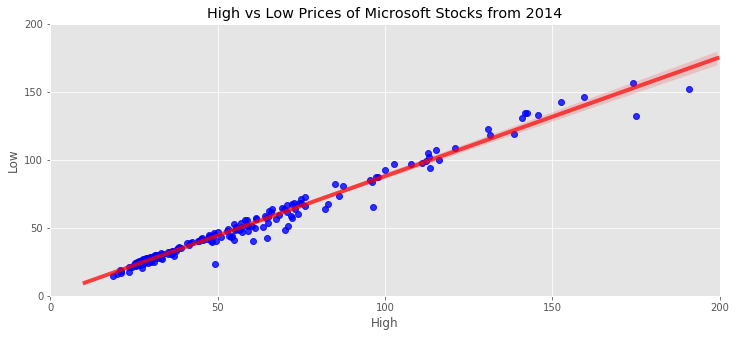

In [115]:
style.use('ggplot')
fig = plt.figure(figsize=(12,5))
ax3 = sns.regplot(x=stock_data['high'], y=stock_data['low'],color='b', line_kws={"color":"r","alpha":0.7,"lw":4})
ax3.set_xticks([0,50,100,150,200])
ax3.set_yticks([0,50,100,150,200])
plt.xlabel('High')
plt.ylabel('Low')
plt.title("High vs Low Prices of Microsoft Stocks from 2014")
plt.show()

>_The regression plot helps to show the outliers in high and low prices of Microsoft from 2014._

#### - <font color=purple>PLOT 6: Area Plot</font>

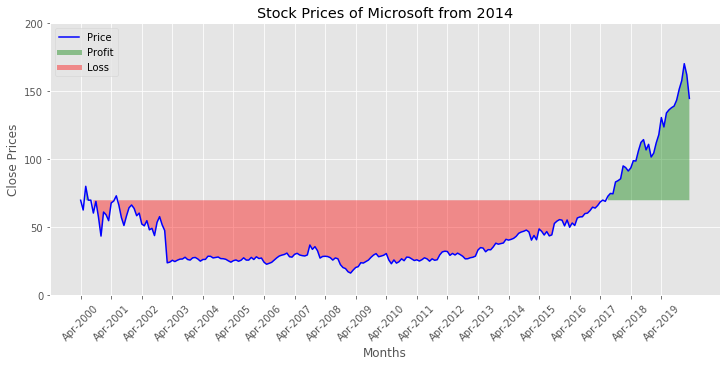

In [116]:
style.use('ggplot')
close = stock_data['close']
date = stock_data['date']
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
#plot
ax.plot_date(date, close, '-', label='Price', color='blue')
ax.plot([],[], linewidth=5, label='Profit', color='g',alpha=0.4)
ax.plot([],[], linewidth=5, label='Loss', color='r',alpha=0.4)
ax.fill_between(date,close, close[0], where=(close>close[0]),facecolor='g',alpha=0.4) #if we buy the stock at 67 i.e the price in April 2000
ax.fill_between(date,close, close[0], where=(close<close[0]),facecolor='r',alpha=0.4) 
ax.set_yticks([0,50,100,150,200])

ax.set_xticks(date[::12]) #displaying every 12th value
ax.set_xticklabels(date[::12], rotation=45)


#title
plt.title('Stock Prices of Microsoft from 2014')
#legend
plt.legend()
#labels
plt.xlabel('Months')
plt.ylabel('Close Prices')
#plt.xticks(numpy.arange(len(stock_data['date'])), stock_data['date'],rotation = 40)
#plt.grid()
plt.show()

>_'Close' prices are always considered ideal to check the growth of a company. Suppose we bought the stocks at the price of 67 which is the price in Apr 2000, then the area marked in red shows that the we would be in loss till 2017 and from 2017 we would be profited._

#### - <font color=purple>PLOT 7: Candlestick</font>

Candlestick plots are used to represent financial plots. It has inbuilt function to represent Open, High, Low, Close prices to represent the stock trends with details.

In [117]:
init_notebook_mode(connected=True) # using plotly offline

fig = go.Figure(data=[go.Candlestick(x=stock_data['date'],
                open=stock_data['open'],
                high=stock_data['high'],
                low=stock_data['low'],
                close=stock_data['close'])])

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title='Ideal Buying and Selling of Stocks',
    yaxis=dict(title='Prices'),
    xaxis=dict(title='Timeline'),
    showlegend=True
)
#fig.write_html("candlestick.html")
#py.offline.plot(fig, filename = 'candlestick.html', auto_open=False)
fig.show()

>_If we zoom into Mar-2020, we will notice that the month ended negatively as 'close' is less than 'open' (which is why it is marked red). On the other hand if we look at Jan-2020, 'close' is greater than 'open'(which is why it is marked in green)._

***